https://medium.com/@brendan_ward/introducing-geofeather-a-python-library-for-faster-geospatial-i-o-with-geopandas-341120d45ee5


https://pypi.org/project/geofeather/

In [1]:
%matplotlib inline
from matplotlib import pyplot
import numpy as np
import geopandas as gpd
import pandas as pd
from geofeather import to_geofeather, from_geofeather, to_shp

In [2]:
%%timeit
gdf = gpd.read_file('RPA_hexagons.shp')

534 ms ± 57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
gdf = gpd.read_file('RPA_hexagons.shp') ## just to set the geodataframe

In [4]:
%%timeit
gdf.to_file("RPA_hexagons_stats_out.shp")

1.77 s ± 130 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%%timeit
to_geofeather(gdf, 'RPS.feather')

260 ms ± 51.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit
df = from_geofeather('RPS.feather')

221 ms ± 25.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
df = from_geofeather('RPS.feather')
print(df.head())

           CROMEID   REFDATE LUCODE  name  \
0  RPA484726101452  20171123   AC66     1   
1  RPA484186098369  20171123   AC17     2   
2  RPA478366099304  20171123   AC66     3   
3  RPA481726097919  20171123   PG01     4   
4  RPA482446100205  20171123   PG01     5   

                                            geometry  
0  POLYGON ((655102.707 5630575.116, 655062.703 5...  
1  POLYGON ((654604.388 5627484.487, 654564.385 5...  
2  POLYGON ((648770.323 5628410.403, 648790.793 5...  
3  POLYGON ((652150.275 5627000.826, 652110.272 5...  
4  POLYGON ((652858.927 5629331.984, 652839.394 5...  


In [8]:
print(type(df))

<class 'geopandas.geodataframe.GeoDataFrame'>


8147


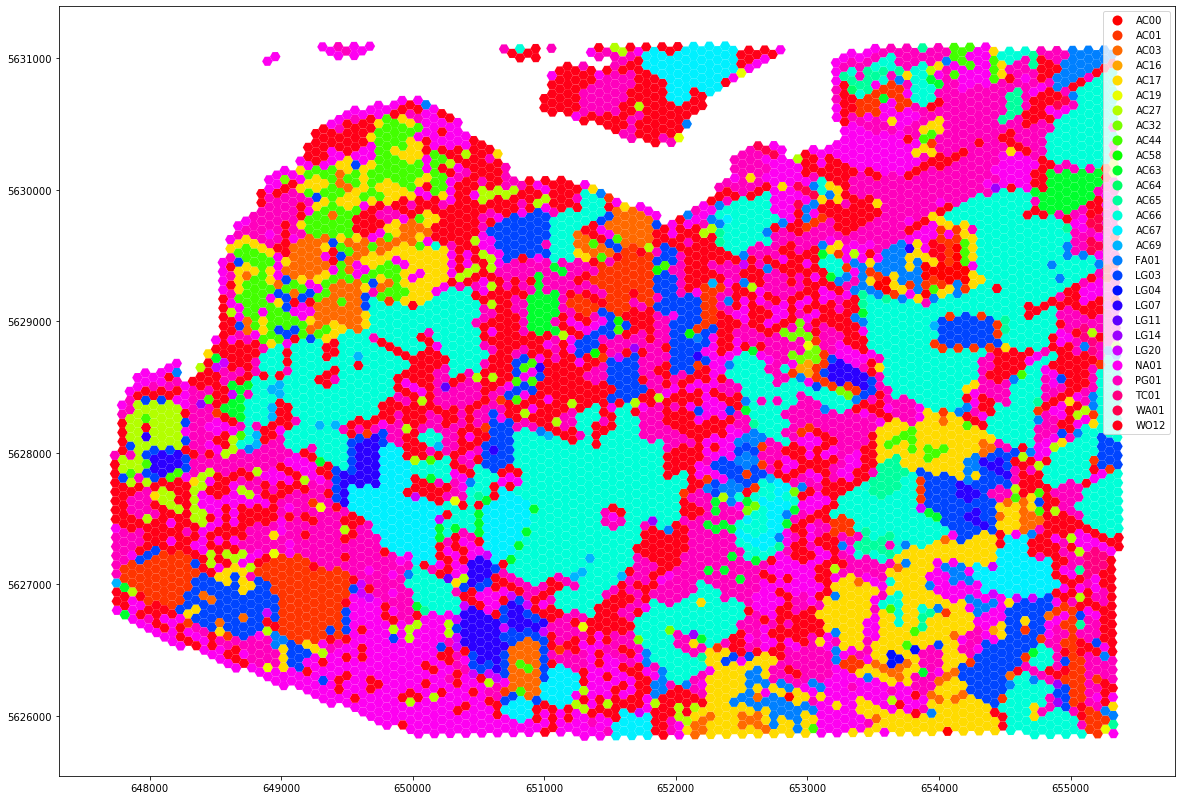

In [9]:
print(len(df))
df.plot(column='LUCODE', cmap='hsv', legend=True, figsize=(20, 20))